### 1. Generate 2D Gaussian distribution

----------------------------------------

In [1]:
import numpy as np 
from math import *
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import Image, display, Math, Latex

# this allows plots to appear directly in the notebook
%matplotlib inline
%config IPCompleter.greedy=True

# Params
n_inpoints = 100

# Functions 

#### Class 0

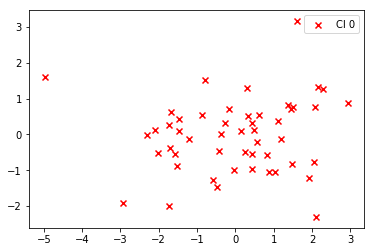

In [2]:
theta0 = 0
lmb01 = 2
lmb02 = 1
m0 = (0,  0)
# computing u * u.T and later multiplying with lambda
cov01 = [[(cos(theta0))**2,    cos(theta0)*sin(theta0)], 
         [(sin(theta0))*cos(theta0), (sin(theta0))**2]]
cov02 = [[(sin(theta0))**2,    -(cos(theta0)*sin(theta0))], 
         [-(cos(theta0)*sin(theta0)), (cos(theta0))**2]]
cov0 = lmb01*np.matrix(cov01) + lmb02*np.matrix(cov02)
x0, y0 = np.random.multivariate_normal(m0, cov0, int(n_inpoints/2)).T
plt.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
plt.legend()    
plt.show()

#### Class 1 (Mixture A & B)

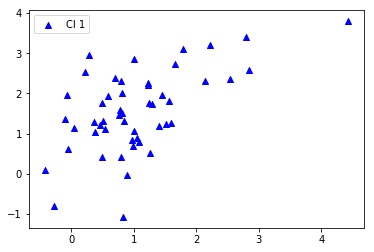

In [3]:
# Mixture A
theta1a = -3*pi/4
lmb1a1 = 2
lmb1a2 = 1/4
m1a = (-2, 1)
cov1a = [[(cos(theta1a))**2,    cos(theta1a)*sin(theta1a)], 
         [(sin(theta1a))*cos(theta1a), (sin(theta1a))**2]]
cov2a = [[(sin(theta1a))**2,    -(cos(theta1a)*sin(theta1a))], 
         [-(cos(theta1a)*sin(theta1a)), (cos(theta1a))**2]]
cov1a = lmb1a1*np.matrix(cov1a) + lmb1a2*np.matrix(cov2a)
x1a, y1a = np.random.multivariate_normal(m1a, cov1a, int(n_inpoints/2)).T
#print('Shape: ',x1a.shape,', ',y1a.shape,', ',cov1a)

# Mixture B
theta1b = pi/4
lmb1b1 = 3
lmb1b2 = 1
m1b = (3, 2)
cov1b = [[(cos(theta1b))**2,    cos(theta1b)*sin(theta1b)], 
         [(sin(theta1b))*cos(theta1b), (sin(theta1b))**2]]
cov2b = [[(sin(theta1b))**2,    -(cos(theta1b)*sin(theta1b))], 
         [-(cos(theta1b)*sin(theta1b)), (cos(theta1b))**2]]
cov1b = lmb1b1*np.matrix(cov1b) + lmb1b2*np.matrix(cov2b)
x1b, y1b = np.random.multivariate_normal(m1b, cov1b, int(n_inpoints/2)).T
#print('Shape: ',x1b.shape,', ',y1b.shape,', ',cov1b)

# Class 1 (A * 0.33 +B * 0.66)
y1 = np.array(y1a)* (1 / 3)+np.array(y1b)* (2 / 3)
x1 = np.array(x1a)* (1 / 3)+np.array(x1b)* (2 / 3)
plt.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
plt.legend()    
plt.show()

#### Combined plot 

Shape; X: (100,) , Y: (100,)


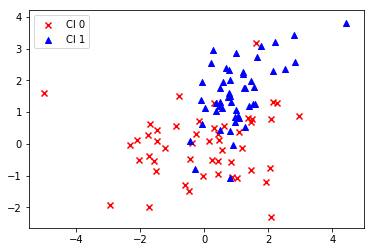

In [4]:
x = np.concatenate((x0, x1))
y = np.concatenate((y0, y1))
print('Shape; X:',x.shape,', Y:',y.shape)
plt.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
plt.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
plt.legend()    
plt.show()

### 2. MAP 

- Compute log likelihoods as log((pdf y1)/(pdf y0)) > 0 ===> [Class1]
- We can then find the values of µ and σ that maximize the log likelihood by taking derivative
with respect to the desired variable and solving the equation obtained.
- MLE for parameters mean and variance
\begin{equation}
\hat{\mu} = \frac{1}{N} {{\sum}}_{n=1}^{N}x_n
\end{equation}

\begin{equation}
\hat{\sigma}^2 = \frac{1}{N} {{\sum}}_{n=1}^{N}(x_n - \hat{\mu})^2
\end{equation}

In [5]:
# Estimating the mean vector.
muMle = np.mean(y, axis=0)
print('MLE')
print('u:', muMle)
covMle = np.cov(x,y)
print('C:', covMle)

# Take the log likelihood based on the generated data
y0_ll = norm.pdf(y0)
y1_ll = norm.pdf(y1)
y_ll = np.log2(y1_ll / y0_ll) 
#print('LL:',y_ll)

MLE
u: 0.7701961325271026
C: [[1.92305957 0.76546297]
 [0.76546297 1.6765997 ]]


In [6]:
zx_ll = []
zy_ll = []
# Obtain intersection
idx = 0
for xl in y_ll:
    # Compare with 0
    if xl < 0.2 and xl > -0.2:       
        zy_ll.append(y[idx])
        zx_ll.append(x[idx])
    idx = idx+1
# Taking first two points: ==> FIX ME
# need a slope and c to fix the position of line
slope = (zy_ll[0]-zy_ll[1]) / (zx_ll[0]-zx_ll[1])
c = zy_ll[0] - slope * zx_ll[0]
print(c, slope)

2.2951905948782096 0.9932770630614778


Shape; X: (100,) , Y: (100,)
X, -5.462660651957317 4.909170978789735
Y, -3.130744933999452 7.171357526757118


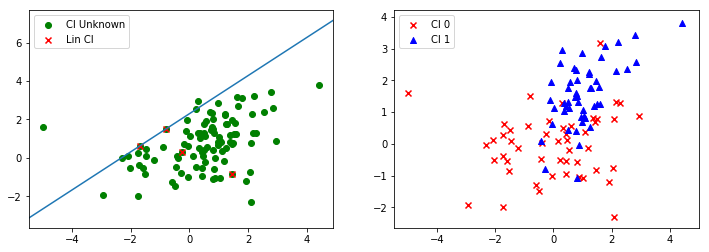

In [18]:
# plot - 
# ==============================
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
print('Shape; X:',x.shape,', Y:',y.shape)
ax1.scatter(x, y, color = 'g',marker='o', label = 'Cl Unknown')
ax1.scatter(zx_ll, zy_ll, color = 'r',marker='x', label = 'Lin Cl')

x_min, x_max = ax1.get_xlim()
y_minl, y_maxl = ax1.get_ylim()
y_min = (c + slope*(x_min)) if slope>0 else (c + slope*(x_max))
y_max = (c + slope*(x_max)) if slope>0 else (c + slope*(x_min))

print("X,",x_min, x_max)
print("Y,",y_min, y_max)
ax1.plot([x_min, x_max], [y_min, y_max])
ax1.set_xlim([x_min, x_max])
ax1.legend()    


ax2.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
ax2.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
ax2.legend()    

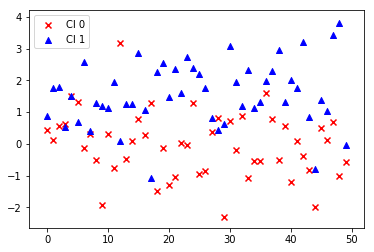

In [8]:
# Printing PDF Y0 and Y1 
freex = np.arange(0, int(n_inpoints/2), 1)
plt.scatter(freex, y0, color = 'r',marker='x', label = 'Cl 0')
plt.scatter(freex, y1, color = 'b',marker='^', label = 'Cl 1')
#plt.scatter(freex, z_ll, color = 'y',marker='o', label = 'Cl 1')
plt.legend() 
plt.show()